<center>

## Organización de Datos: Trabajo Práctico N° 1 
### (1° Cuatrimestre 2020) 
###  Análisis Exploratorio (Grupo N°1)
</center>
 


In [2]:
## Importamos librerías
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import unidecode
sns.set(style="whitegrid")

In [3]:
##Leemos el csv
df = pd.read_csv('train.csv')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7613 entries, 0 to 7612
Data columns (total 7 columns):
id           7613 non-null int64
keyword      7613 non-null object
location     5080 non-null object
text         7613 non-null object
target       7613 non-null int64
longitud     7613 non-null int64
Veracidad    7613 non-null object
dtypes: int64(3), object(4)
memory usage: 475.8+ KB


In [5]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
#Chequeo que no tengamos id repetidas
df.id.unique().size

7613

In [7]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

### 1) Análisis de la longitud de los Tweets

In [8]:
#Agregamos una columna con la longitud de cada tweet
df['longitud'] = df.apply(lambda row: len(row['text']),axis=1)

In [9]:
df.head()

,id,keyword,location,text,target,longitud
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [10]:
df['longitud'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: longitud, dtype: float64

In [11]:
df.groupby('target')['longitud'].agg(['min', 'max','mean','median'])

,min,max,mean,median
target,,,,
0,7,157,95.706817,101
1,14,151,108.113421,115


In [12]:
df['Veracidad']= 'Otro' 
df.loc[df['target']== 1,'Veracidad']= 'Verdadero'
df.loc[df['target']== 0,'Veracidad']= 'Falso'

In [13]:
df.head()

,id,keyword,location,text,target,longitud,Veracidad
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69,Verdadero
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38,Verdadero
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133,Verdadero
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65,Verdadero
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88,Verdadero


In [14]:
# Me fijo si se asignó correctamente el valor de veracidad "Verdadero" o "Falso" si el "target" era 1 o 0 respectivamente
df['Veracidad'].value_counts()

Falso        4342
Verdadero    3271
Name: Veracidad, dtype: int64

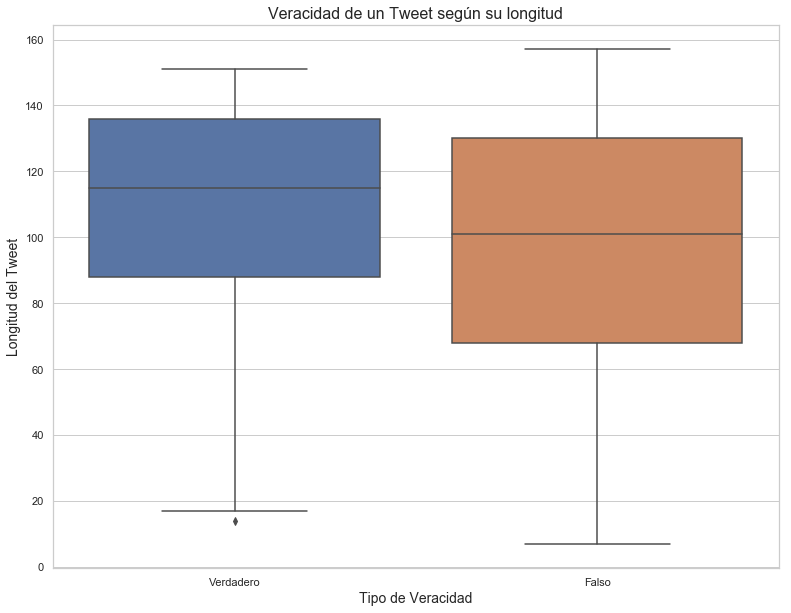

In [15]:
fig, ax = plt.subplots(figsize=(13,10))
ax = sns.boxplot(x='Veracidad', y='longitud', data=df)
ax.set_xlabel('Tipo de Veracidad',fontsize=14);
ax.set_ylabel('Longitud del Tweet',fontsize=14);
ax.set_title("Veracidad de un Tweet según su longitud", fontsize=16);
#plt.savefig('grafico_1.png')

### 2) Análisis de KeyWord

> * Un primer análisis para tener una idea de cuáles son las palabras más frecuentes de KeyWord utilizamos Wordcloud.

In [16]:
df.keyword.fillna('Nada',inplace=True)

In [32]:
#Exploramos un poco las keywords
mis_keywords = df.loc[df['keyword']!= 'Nada',:]
from IPython.core.display import HTML
palabras = mis_keywords['keyword'].sample(12).values;
for palabra in palabras:
    display(HTML(palabra+"<hr>"))

In [18]:
df.loc[df['target']== 0,'keyword'].value_counts().head(15)

body%20bags    40
harm           37
armageddon     37
wrecked        36
ruin           36
deluge         36
fear           35
explode        35
siren          35
twister        35
screaming      34
panic          34
aftershock     34
sinking        33
blizzard       33
Name: keyword, dtype: int64

In [22]:
df.loc[df['target']== 1,'keyword'].value_counts().head(15)

nada                 42
outbreak             39
derailment           39
wreckage             39
typhoon              37
oil spill            37
debris               37
evacuated            32
suicide bombing      32
rescuers             32
suicide bomb         32
razed                31
nuclear disaster     31
earthquake           30
airplane accident    30
Name: keyword, dtype: int64

In [20]:
def limpieza_texto(df,name_col):
    #####saco todo lo que sea codigo HTML
    df.loc[:,name_col] = df[name_col].apply(lambda s: re.sub('<.*?>', '', s))
    ##### saco todo lo que no sea alfanumerico
    df.loc[:,name_col] = df[name_col].apply(lambda s: re.sub(r'[^\w]', ' ', s))
    ###### lo paso a minuscula
    df.loc[:,name_col] = df[name_col].apply(lambda s: s.lower())
    ####### saco los acentos
    df.loc[:,name_col] = df[name_col].apply(lambda s: unidecode.unidecode(s))  
    
    if name_col == 'keyword':
        #### quito el numero 20 que aparece en la keyword
        df.loc[:,name_col] = df[name_col].apply(lambda s: re.sub('20', ' ', s))
    ###### remuevo los espacios en blanco de mas
    df.loc[:,name_col] = df[name_col].apply(lambda s: re.sub(' +',' ',s))
    return df

df = limpieza_texto(df,'keyword')

In [29]:
df = df.loc[df['keyword']!= 'nada',:]

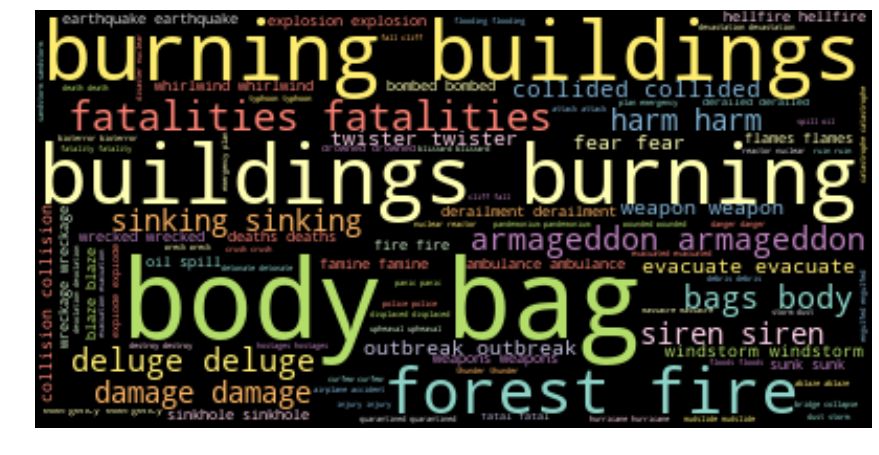

In [30]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in df['keyword'])
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="black").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

> #### 2.1) Top 10 KeyWord para target = 0 

Text(0, 0.5, 'KeyWords')

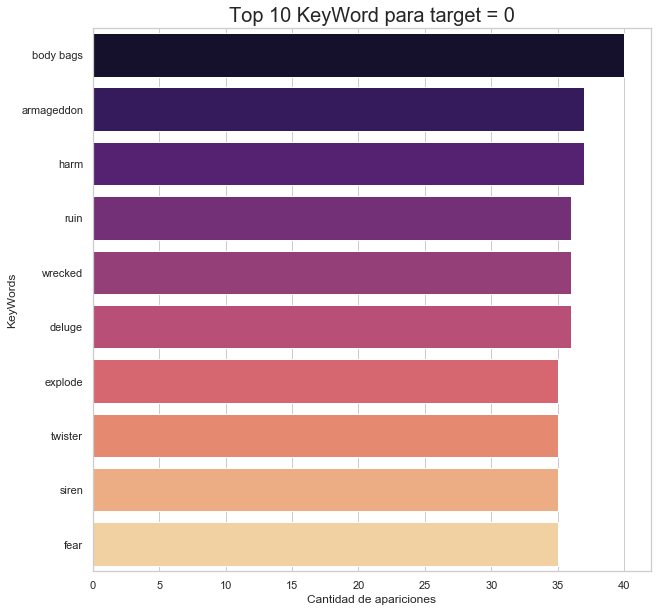

In [39]:
top_KeyWord = df.loc[df['target']== 0,'keyword'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=top_KeyWord.values,y=top_KeyWord.index,orient='h',palette="magma")
grafico_top_key.set_title("Top 10 KeyWord para target = 0",fontsize=20)
grafico_top_key.set_xlabel("Cantidad de apariciones",fontsize=12)
grafico_top_key.set_ylabel("KeyWords",fontsize=12)
#plt.savefig('grafico_2')

> #### 2.2) Top 10 KeyWord para target = 1 

Text(0, 0.5, 'KeyWords')

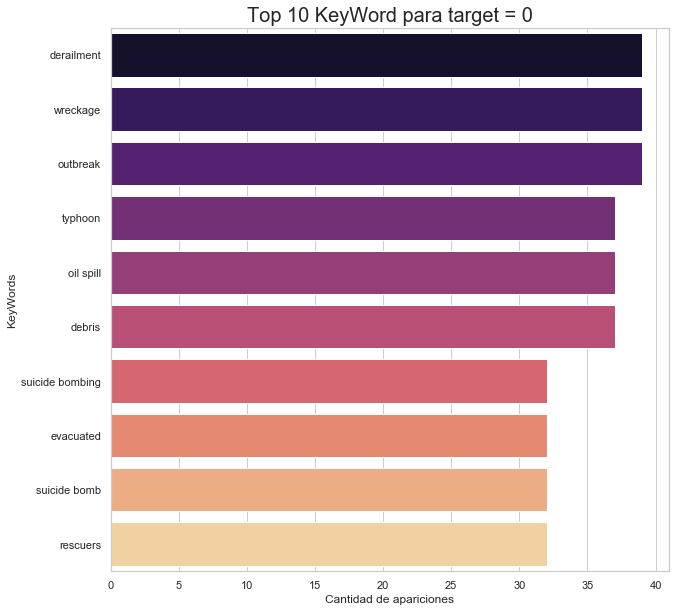

In [37]:
top_KeyWord = df.loc[df['target']== 1,'keyword'].value_counts().head(10)
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=top_KeyWord.values,y=top_KeyWord.index,orient='h',palette="magma")
grafico_top_key.set_title("Top 10 KeyWord para target = 0",fontsize=20)
grafico_top_key.set_xlabel("Cantidad de apariciones",fontsize=12)
grafico_top_key.set_ylabel("KeyWords",fontsize=12)
#plt.savefig('grafico_3')

### 2) Análisis de Twetts

In [40]:
#Exploramos un poco los twits
from IPython.core.display import HTML
descripciones = df['text'].head(20).values;
for descripcion in descripciones:
    display(HTML(descripcion+"<hr>"))